In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from pandas.api.types import CategoricalDtype
%load_ext autoreload

%autoreload 2

In [23]:
df = loadData()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [24]:
qqdf,ppc = qualtoquan(df)
qqdf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


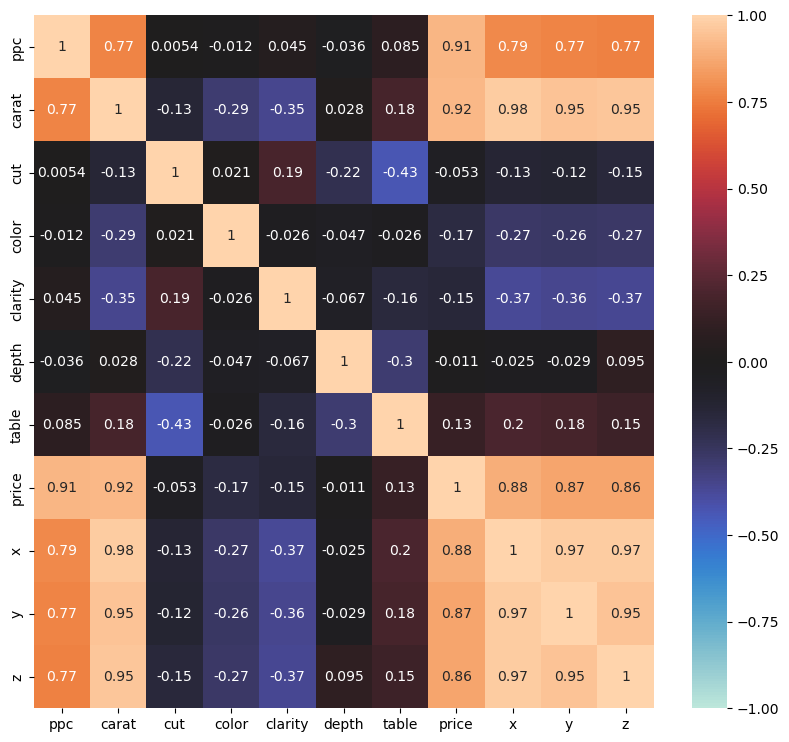

In [25]:
plt.figure(figsize=(10,9))
corrHeatmap = sns.heatmap(ppc.corr(),vmin=-1,vmax=1,center=0,annot=True)

In [8]:
qqdf.corr()['price'].to_csv("../Figures/Question-1/price_corr_table.csv")
print(qqdf.corr()['price'])

carat      0.921591
cut       -0.053493
color     -0.172509
clarity   -0.146802
depth     -0.010648
table      0.127134
price      1.000000
x          0.884436
y          0.865422
z          0.861250
Name: price, dtype: float64


In [27]:
ppc.corr()['ppc'].to_csv("../Figures/Question-1/ppc_corr_table.csv")
print(ppc.corr()['ppc'])

ppc        1.000000
carat      0.769457
cut        0.005420
color     -0.011980
clarity    0.045125
depth     -0.035724
table      0.084585
price      0.912302
x          0.787346
y          0.771730
z          0.765542
Name: ppc, dtype: float64


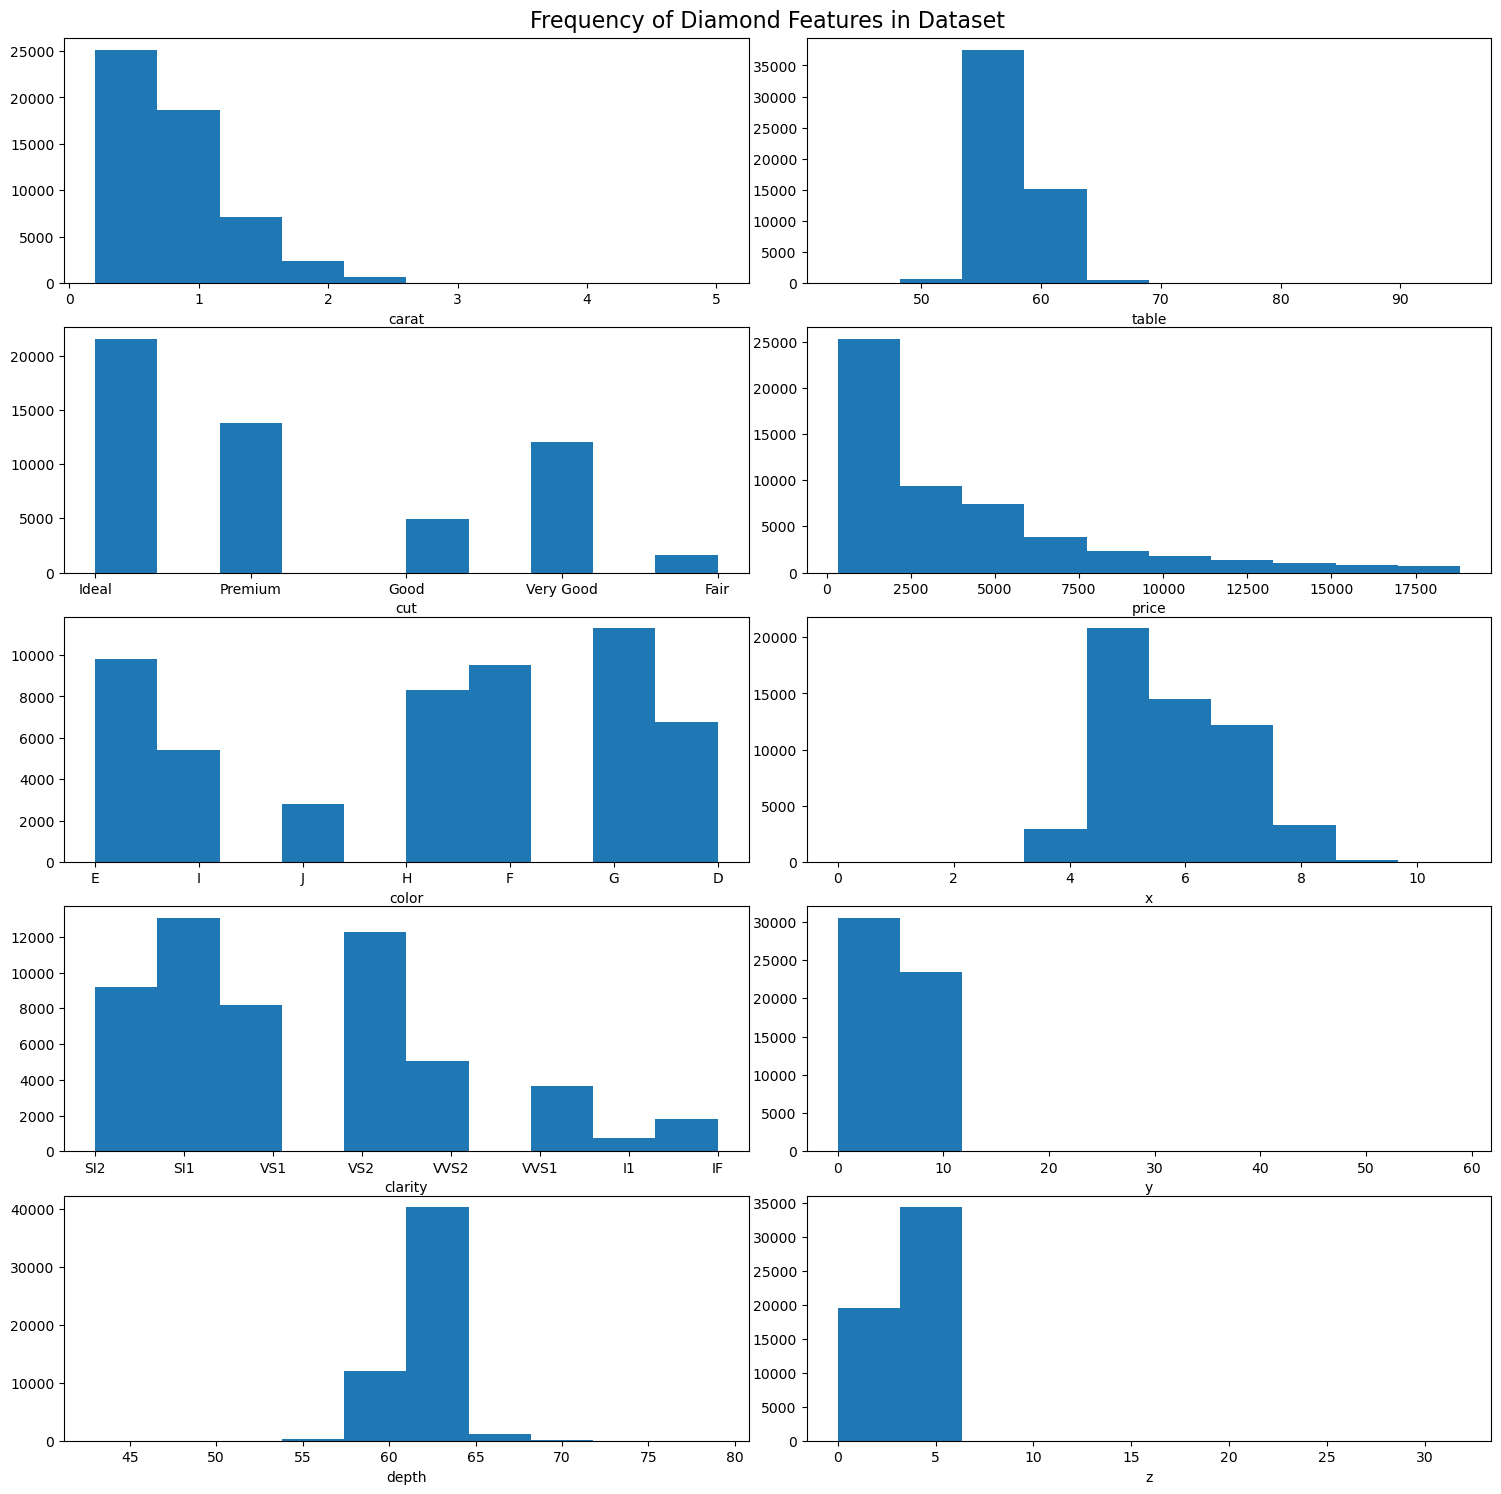

In [9]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    axs[i-numRows*j,j].hist(df[x])
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1

<Axes: title={'center': 'price'}, xlabel='clarity'>

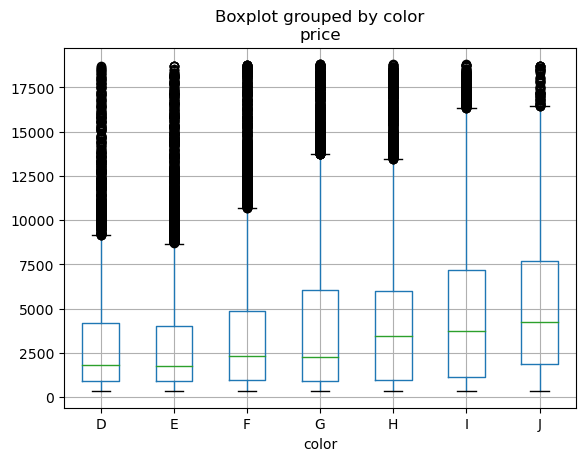

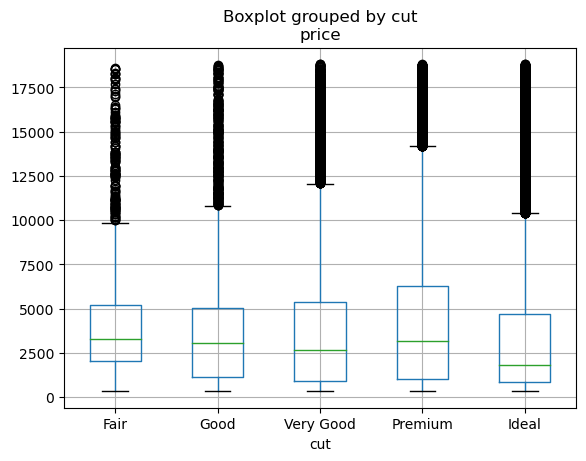

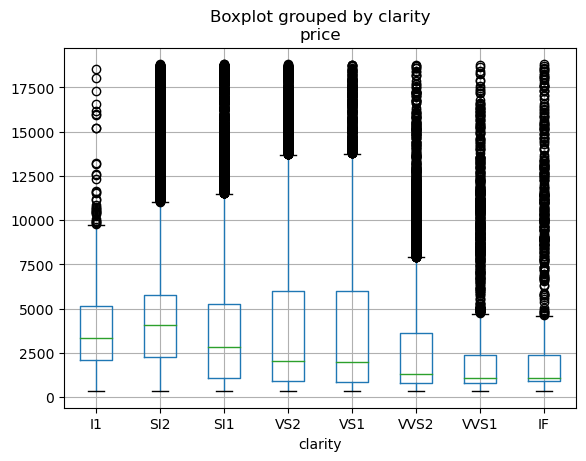

In [11]:
cutLabels = ["Fair","Good","Very Good", "Premium", "Ideal"]
clarityLabels = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
df.boxplot(column='price',by='color')
cutOrder = CategoricalDtype(cutLabels, ordered=True)
df['cut']=df['cut'].astype(cutOrder)
df.boxplot(column='price',by='cut')
clarityOrder = CategoricalDtype(clarityLabels, ordered=True)
df['clarity'] = df['clarity'].astype(clarityOrder)
df.boxplot(column='price',by='clarity')